1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.stats
import matplotlib.cm as cm
import math

%matplotlib inline

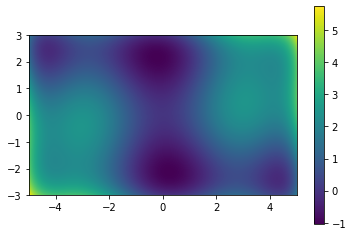

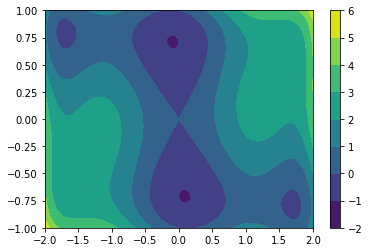

Global minimum 1 : f( [ 0.08984184 -0.71265628] ) =  -1.0316284534896594
Global minimum 2 : f( [-0.08984185  0.71265627] ) =  -1.0316284534896498
Global minimum with initial guess (0,0) : f( [0. 0.] ) =  0.0


In [25]:
#Six-hump camelback
def f(x):
    return (4 - 2.1*x[0]**2 + (x[0]**4)/3) * x[0]**2 + x[0]*x[1] + (4*x[1]**2 - 4)*x[1]**2

x = np.linspace(-2,2,1000)
y= np.linspace(-1,1,1000)

# meshgrid
xx, yy = np.meshgrid(x, y, sparse=True)
z = f([xx,yy])

plt.figure()
plt.imshow(z, extent=[-5, 5, -3, 3], origin="lower")
plt.colorbar()
plt.show()

#contourf
plt.figure()
h = plt.contourf(x,y,z)
plt.colorbar()
plt.show()

#Global minima
min_g_1 = optimize.minimize(f, [-2, -1])
min_g_2 = optimize.minimize(f, [+2, +1])

print("Global minimum 1 : f(",min_g_1.x,") = ",min_g_1.fun)
print("Global minimum 2 : f(",min_g_2.x,") = ",min_g_2.fun)

#Initial guess of (𝑥,𝑦)=(0,0)
#We don't find the real minimas
min_g_3 = optimize.minimize(f, [0, 0])
print("Global minimum with initial guess (0,0) : f(",min_g_3.x,") = ",min_g_3.fun)

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

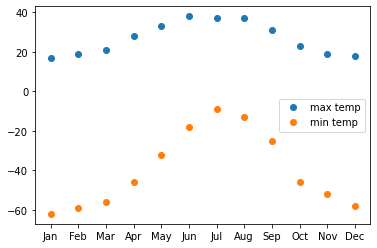

In [27]:
#Plot the temperatures

max_t = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_t = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.plot(months, max_t,'o', label='max temp')
plt.plot(months, min_t,'o', label='min temp')
plt.legend()

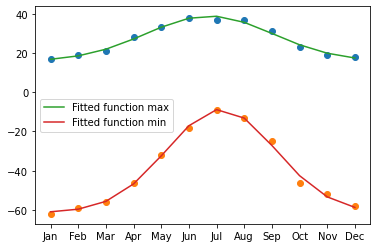

In [44]:
#Define gaussian function
def gauss(x, mu, sig, ampl, offset):
    return offset + ampl * scipy.stats.norm.pdf(x,mu,sig)

opt_max, cov_max = scipy.optimize.curve_fit(gauss, range(12), max_t, p0=[6,1,20,40])
opt_min, cov_min = scipy.optimize.curve_fit(gauss, range(12), min_t, p0=[6,1,0,-60])

#Display the dataset of temperatures
plt.plot(months, max_t,'o')
plt.plot(months, min_t,'o')

#Display the function founded
plt.plot(months, gauss(range(12), opt_max[0], opt_max[1],opt_max[2],opt_max[3]),label='Fitted function max')
plt.plot(months, gauss(range(12), opt_min[0], opt_min[1],opt_min[2],opt_min[3]),label='Fitted function min')

plt.legend(loc='best')

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [70]:
#import pickle
import pandas as pd
import numpy as np

data = pd.DataFrame(np.load('data/residuals_261.pkl',allow_pickle=True).item())
data = data[data['residuals'] > -10]

data

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


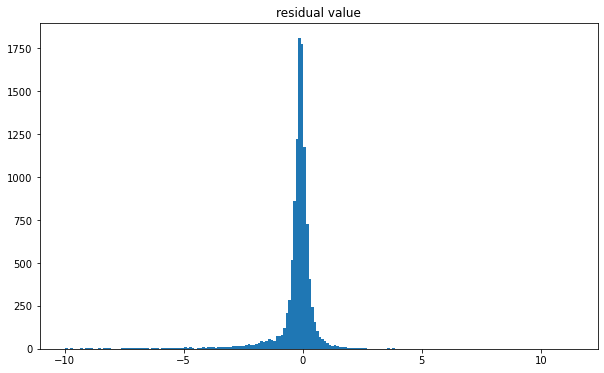

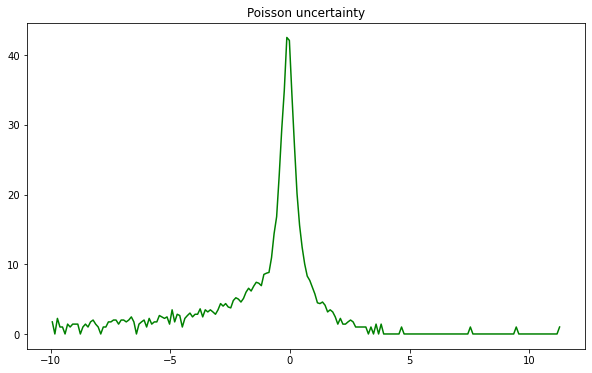

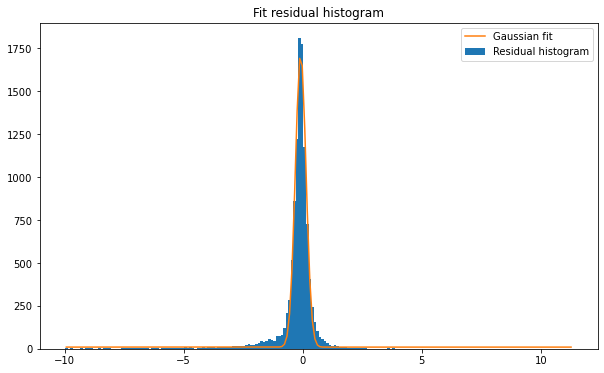

In [81]:
fig, ax = plt.subplots(figsize=(10, 6))
h, bins, _ = plt.hist(data['residuals'], bins=200)

bin_centres = (bins[:-1] + bins[1:])/2.

ax.set_title('residual value')

fig, ax = plt.subplots(figsize=(10, 6))
sig_y = np.sqrt(np.abs(h))
ax.plot(bin_centres, sig_y, color="green")
ax.set_title('Poisson uncertainty')


par, par_cov = optimize.curve_fit(gauss, bin_centres, h, full_output=False)

fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(data['residuals'], bins=200, label='Residual histogram')
plt.plot(bin_centres, gauss(bin_centres, *par), label='Gaussian fit')

ax.set_title('Fit residual histogram')
ax.legend()

In [84]:
from scipy import stats

ndof = len(bin_centres) - 1
print("n degrees of freedom =", ndof)
# calculate the chi^2
chi2 = np.sum(((h - gauss(bin_centres, *par))**2) / sig_y)
print("chi2 =", chi2)
# calculate the p-value from the chi^2, the n.d.o.f., and the comulative chi^2 distribution
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue) # if the p-value is < 0.05, the fit is considered unsatisfactory
print("p value is <0.05, the fit is unsatisfactory")

n degrees of freedom = 199
chi2 = inf
p-value = 0.0
p value is <0.05, the fit is unsatisfactory


<ipython-input-84-2e5cd525f27e>:6: RuntimeWarning: divide by zero encountered in true_divide
  chi2 = np.sum(((h - gauss(bin_centres, *par))**2) / sig_y)


4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [102]:
def f(t, a, b ,c):
    return a*np.cos(2*math.pi*t + b) + c

def g(t, a, b, c, d):
    return a * np.cos(2*np.pi*b*t + c) + d

data = pd.read_csv('data/munich_temperatures_average_with_bad_data.txt', sep=" ", names=['date', 'temp'])
data = data[(data['date'] >= 2008) & (data['date'] <= 2012)]
data

,date,temp
4748,2008.00274,-2.94444
4749,2008.00548,-2.66667
4750,2008.00821,-2.66667
4751,2008.01095,-2.00000
4752,2008.01369,-1.94444
...,...,...
6204,2011.98836,3.44444
6205,2011.99110,1.27778
6206,2011.99384,2.88889
6207,2011.99658,1.83333


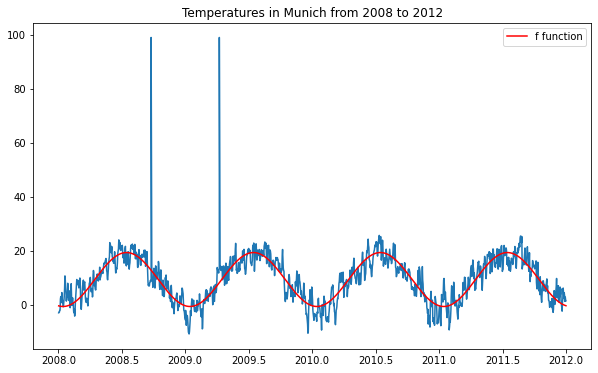

Parameters
a =  -9.988133689134516
b =  12.333023014196588
c =  9.38411486809072
Average temperature :  9.38409773497604
Coldest value :  19.372195568442635
Hottest value :  -0.6037388871173217
The b value corresponds to the phase. So it's needed to shift the sinusoidal function over the time


In [105]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data['date'],data['temp'])
ax.set_title("Temperatures in Munich from 2008 to 2012")
par_1,_ = optimize.curve_fit(f, data['date'], data['temp'])

f_fit = f(data['date'], *par_1)
ax.plot(data['date'],f_fit,'r-', label="f function")
ax.legend()
plt.show()

print('Parameters')
print('a = ', par_1[0])
print('b = ', par_1[1])
print('c = ', par_1[2])
print("Average temperature : ", data['temp'].mean())
print("Coldest value : ", max(f_fit))
print("Hottest value : ", min(f_fit))
print("The b value corresponds to the phase. So it's needed to shift the sinusoidal function over the time")


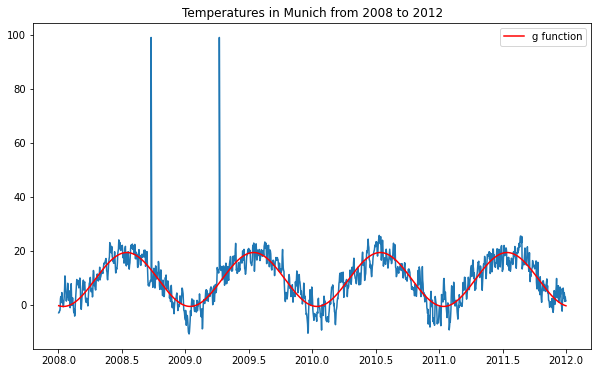

In [106]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data['date'],data['temp'])
ax.set_title("Temperatures in Munich from 2008 to 2012")
par_2,_ = optimize.curve_fit(g, data['date'], data['temp'])

g_fit = g(data['date'], *par_2)
ax.plot(data['date'], g_fit,'r-', label="g function")
ax.legend()
plt.show()

In [113]:
# define function for F-test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL